## angle dependence of magic ellipticity

In [62]:
import sys
sys.path.append('/home/jtzhang/Documents/lab/code/calculations/2021-12-rot-states/')

from lib.am_utils import *
from lib.mol_functions import *
import lib.consts as c

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib inline

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
pd.set_option('expand_frame_repr', False)


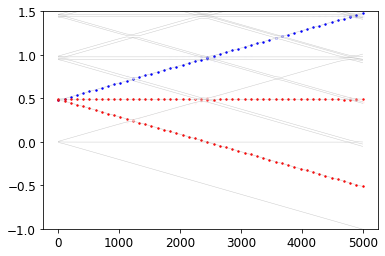

In [48]:
p = p0.copy()
p['N'] = arange(0,1)
p['E_td_00'] = np.linspace(0,5000,50)
# p['B'] = np.linspace(866,866,1)
chi = np.arccos(1/3)/2
# chi = np.deg2rad(20)
p['trap_pol'] = np.array([[np.cos(chi)],[1j*np.sin(chi)],[0]])

H_B,b_uc = H_mol(p)
E0, Ev0 = calc_eig(H_B)

E_offset = E0[:,0].reshape(len(E0[:,0]),1)

ax = plt.subplot(1,1,1)
x = p['E_td_00']
ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
plt.ylim(-1,1.5)

dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

for i,xx in enumerate(x):
    dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
    dm_this = dm_this / np.max(dm_this)
    inds = np.argwhere(np.abs(dm_this) > 0.001)
    for j in inds:
        ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
for i,xx in enumerate(x):
    dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
    dd = dd / np.max(dd)
    inds = np.argwhere(dd > 0.001)
    for j in inds:
        ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        


In [49]:
p = p0.copy()
p['N'] = arange(0,1)
p['E_td_00'] = np.linspace(4000,4000,1)
p['B'] = np.linspace(866,866,1)
chi = np.arccos(1/3)/2
# chi = np.deg2rad(10)
p['trap_pol'] = np.array([[np.cos(chi)],[1j*np.sin(chi)],[0]])

H_B,b_uc = H_mol(p)
E0, Ev0 = calc_eig(H_B)

E_offset = E0[:,0].reshape(len(E0[:,0]),1)

calc_uwave(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

Ev index: 1
     m_i1  m_i2    n  m_n      amps
120   1.5   2.5  0.0  0.0 -0.999821
92    0.5   3.5  0.0  0.0  0.018945
     m_i1  m_i2    n  m_n   mF      sig-        pi      sig+      E [kHz]  rot  v_ind
121   1.5   2.5  1.0 -1.0  3.0  -0.40939  -0.00000  -0.40703     0.000000  1.0     33
123   1.5   2.5  1.0  1.0  5.0  -0.40646  -0.00000   0.40904   800.679430 -1.0     37
122   1.5   2.5  1.0  0.0  4.0  -0.00000  -0.57640   0.00000  1591.178696  0.0     46
91    0.5   2.5  1.0  1.0  4.0   0.00000  -0.02926  -0.00000  1756.910185 -1.0     47
113   1.5   0.5  1.0 -1.0  1.0  -0.01955   0.00000   0.01364   976.146398  1.0     39
126   1.5   3.5  1.0  0.0  5.0   0.00694  -0.00000  -0.01246  1119.324061  0.0     40
119   1.5   1.5  1.0  1.0  4.0  -0.00000   0.01193   0.00000  1289.587644 -1.0     42
89    0.5   2.5  1.0 -1.0  2.0   0.00000   0.00759  -0.00000   955.645881  1.0     38
57   -0.5   2.5  1.0 -1.0  1.0  -0.00481   0.00000   0.00127  1921.218331  1.0     49
118   1.5   1.5  1.0

In [37]:
def ls_grad(pp, ind, td0, delta):
    p = pp.copy()
    
    p['E_td_00'] = np.linspace(td0-delta/2,td0+delta/2,2)

    H_B,b_uc = H_mol(p)
    E0, Ev0 = calc_eig(H_B)
    E_offset = E0[:,0].reshape(len(E0[:,0]),1)
    E0 = E0 - E_offset
    E1 = E0[0,ind]
    E2 = E0[1,ind]
#     p['E_td_00'] = p['E_td_00'] + delta
#     H_B,b_uc = H_mol(p)
#     E0, Ev0 = calc_eig(H_B)
#     E_offset = E0[:,0].reshape(len(E0[:,0]),1)
#     E0 = E0 - E_offset
#     E2 = E0[:,ind]

    return (E2-E1)/delta 

Text(0, 0.5, 'light shift @1MHz depth [kHz]')

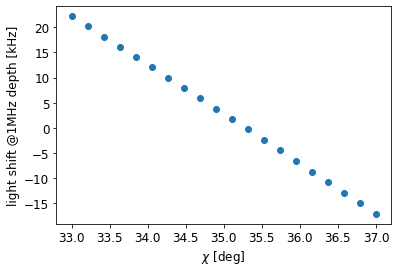

In [63]:
ind_mag = 123
td_delta = 10
td0 = 1000

chi_scan = np.deg2rad(np.linspace(33,37,20)) # np.linspace(0,np.pi/4,20)
lss = np.zeros(chi_scan.shape)
for k in range(len(chi_scan)):
    p = p0.copy()
    chi = chi_scan[k]
    p['trap_pol'] = np.array([[np.cos(chi)],[1j*np.sin(chi)],[0]])    
    lss[k] = ls_grad(p, ind_mag, td0, td_delta)

plt.close('all')
plt.scatter(np.rad2deg(chi_scan), lss*td0)
plt.xlabel('$\chi$ [deg]')
plt.ylabel('light shift @1MHz depth [kHz]')

Text(35, 20, '-9.83 kHz/deg')

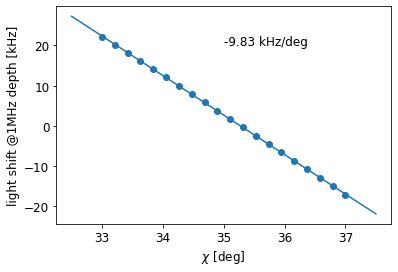

In [102]:
fit_line = lambda x,b,k: b*x+k
popt, pcov = curve_fit(fit_line, np.rad2deg(chi_scan), lss*td0, p0=[-10,353])
xfit = np.linspace(32.5,37.5,100)
yfit = fit_line(xfit,*popt)

plt.close('all')
plt.scatter(np.rad2deg(chi_scan), lss*td0)
plt.plot(xfit, yfit)
plt.xlabel('$\chi$ [deg]')
plt.ylabel('light shift @1MHz depth [kHz]')

plt.text(35,20,'{:.2f} kHz/deg'.format(popt[0]))

In [101]:
'{:.2f} kHz/deg'.format(popt[0])

'-9.83 kHz/deg'

#### waveplate to chi conversion

Text(0, 0.5, '$\\chi$ [deg]')

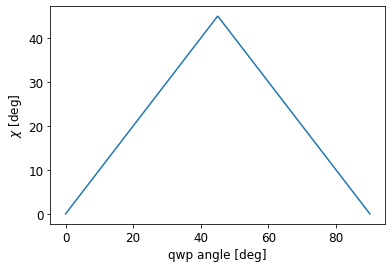

In [140]:
def Mqwp(theta):
    return np.exp(-1j*np.pi/4)*\
        np.array([[np.cos(theta)**2+1j*np.sin(theta)**2, (1-1j)*np.sin(theta)*np.cos(theta)],
                  [(1-1j)*np.sin(theta)*np.cos(theta), np.sin(theta)**2+1j*np.cos(theta)**2]])
    
def norm(v):
    n = np.linalg.norm(v)
    if not (n==0):
        return v/n
    else:
        return v
    
def jones2stokes(v):
    Q = norm(v[0])**2 - norm(v[1])**2
    U = 2*np.real(v[0]*np.conj(v[1]))
    V = -2*np.imag(v[0]*np.conj(v[1]))
    return np.array([Q,U,V])
def jones2stokes2(v):
    ss = jones2stokes(v)
    chi = np.arcsin(ss[2])/2
    psi = np.arctan(ss[1]/ss[0])/2
    return np.real(np.array([chi, psi]))

qwp_angles = np.linspace(0,np.pi/2,1000)
chi_angles = np.zeros(qwp_angles.shape)
for i in range(len(qwp_angles)):
    qwp_a = qwp_angles[i]
    chi_angles[i] = -np.rad2deg(jones2stokes2(Mqwp(qwp_a)@np.array([1,0])))[0]
plt.close('all')
plt.plot(np.rad2deg(qwp_angles), chi_angles)
plt.xlabel('qwp angle [deg]')
plt.ylabel('$\chi$ [deg]')

#### so actually linear, makes sense

### deeper trap (3.7MHz)

Text(35, 50, '-36.38 kHz/deg')

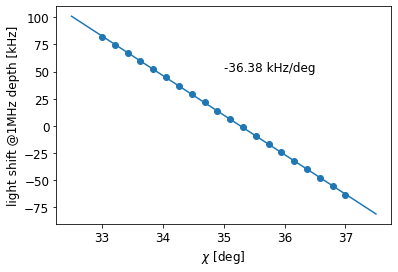

In [105]:
fit_line = lambda x,b,k: b*x+k
popt, pcov = curve_fit(fit_line, np.rad2deg(chi_scan), lss*3700, p0=[-10,353])
xfit = np.linspace(32.5,37.5,100)
yfit = fit_line(xfit,*popt)

plt.close('all')
plt.scatter(np.rad2deg(chi_scan), lss*3700)
plt.plot(xfit, yfit)
plt.xlabel('$\chi$ [deg]')
plt.ylabel('light shift @1MHz depth [kHz]')

plt.text(35,50,'{:.2f} kHz/deg'.format(popt[0]))